In [1]:
import pandas
import shelve
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools
import glob
from sklearn.metrics import precision_recall_fscore_support
import utils
import numpy as np

In [2]:
%matplotlib inline

In [5]:
def show_network_TRANS(scores,zero=10,unite=120,tailleu=100,title="Transform NEwtork"):
    plt.figure(figsize=(20,10))
    plt.axes()
    plt.title(title)
    #zero=10
    #unite=200
    #tailleu=100
    inside=0
    rectangle = plt.Rectangle((zero, zero), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_SPARSE" in scores:
        plt.text(zero+inside,zero+inside,scores["ASR_SPARSE"],color="white")
        #plt.text(zero+inside+60,zero+inside,"0.58",color="red")
 
    rectangle = plt.Rectangle((zero, zero+unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H1" in scores:
        plt.text(zero+inside,zero+1*unite+inside,scores["ASR_AE_H1"],color="white")
 
    rectangle = plt.Rectangle((zero, zero+2*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H2" in scores:
        plt.text(zero+inside,zero+2*unite+inside,scores["ASR_AE_H2"],color="white")
 
    rectangle = plt.Rectangle((zero, zero+3*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_OUT" in scores:
        plt.text(zero+inside,zero+3*unite+inside,scores["ASR_AE_OUT"],color="white")
 
    
    rectangle = plt.Rectangle((zero+3*unite, zero), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_SPARSE" in scores:
        plt.text(zero+3*unite+inside,zero+inside,scores["TRS_SPARSE"],color="black")
 
    rectangle = plt.Rectangle((zero+3*unite, zero+1*unite), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_AE_H1" in scores:
        plt.text(zero+3*unite+inside,zero+1*unite+inside,scores["TRS_AE_H1"],color="black")
 
    rectangle = plt.Rectangle((zero+3*unite, zero+2*unite), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_AE_H2" in scores:
        plt.text(zero+3*unite+inside,zero+2*unite+inside,scores["TRS_AE_H2"],color="black")
    if "ASR_H1_TRANFORMED_TRSH2" in scores:
        plt.text(zero+3*unite+tailleu/2,zero+2*unite+inside,scores["ASR_H1_TRANFORMED_TRSH2"],color="red")   
    if "ASR_H2_TRANFORMED_TRSH2" in scores:
        plt.text(zero+3*unite-tailleu/2,zero+2*unite+inside,scores["ASR_H2_TRANFORMED_TRSH2"],color="green")
 
    rectangle = plt.Rectangle((zero+3*unite, zero+3*unite), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_AE_OUT" in scores:
        plt.text(zero+3*unite+inside,zero+3*unite+inside,scores["TRS_AE_OUT"],color="black")
    if "ASR_H1_TRANFORMED_OUT" in scores:
        plt.text(zero+3*unite+tailleu/2,zero+3*unite+inside,scores["ASR_H1_TRANFORMED_OUT"],color="red")
    if "ASR_H2_TRANFORMED_OUT" in scores:
        plt.text(zero+3*unite-tailleu/2,zero+3*unite+inside,scores["ASR_H2_TRANFORMED_OUT"],color="green")

    rectangle = plt.Rectangle((zero+1*unite, zero+1*unite), tailleu, tailleu, fc='r')
    plt.gca().add_patch(rectangle)
    if "ASR_H1_TRANSFORMED_W1" in scores:
        plt.text(zero+1*unite+inside,zero+1*unite+inside,scores["ASR_H1_TRANSFORMED_W1"],color="black")
 
    rectangle = plt.Rectangle((zero+1*unite, zero+2*unite), tailleu, tailleu, fc='green')
    plt.gca().add_patch(rectangle)
    if "ASR_H2_TRANSFORMED_W1" in scores:
        plt.text(zero+1*unite+inside,zero+2*unite+inside,scores["ASR_H2_TRANSFORMED_W1"],color="white")
 

    rectangle = plt.Rectangle((zero+2*unite, zero+1*unite), tailleu, tailleu, fc='r')
    plt.gca().add_patch(rectangle)
    if "ASR_H1_TRANSFORMED_W2" in scores:
        plt.text(zero+2*unite+inside,zero+1*unite+inside,scores["ASR_H1_TRANSFORMED_W2"],color="black")
 
    rectangle = plt.Rectangle((zero+2*unite, zero+2*unite), tailleu, tailleu, fc='green')
    plt.gca().add_patch(rectangle)
    if "ASR_H2_TRANSFORMED_W2" in scores:
        plt.text(zero+2*unite+inside,zero+2*unite+inside,scores["ASR_H2_TRANSFORMED_W2"],color="white")

    plt.axis('scaled')
    plt.show()

In [6]:

def show_network_RSPE(scores,zero=10,unite=120,tailleu=100,title="REAL SPE NEwtork"):
    plt.figure(figsize=(20,10))
    plt.axes()
    plt.title(title)
    #zero=10
    #unite=200
    #tailleu=100
    inside=0
    rectangle = plt.Rectangle((zero, zero), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR" in scores:
        plt.text(zero+inside,zero+inside,scores["ASR"],color="white")
 
    rectangle = plt.Rectangle((zero, zero+unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H1" in scores:
        plt.text(zero+inside,zero+1*unite+inside,scores["ASR_AE_H1"],color="white")
 
    rectangle = plt.Rectangle((zero, zero+2*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H2" in scores:
        plt.text(zero+inside,zero+2*unite+inside,scores["ASR_AE_H2"],color="white")
    if "ASR_AEH2_SPARSE" in scores :
         plt.text(zero+inside,zero+2*unite+inside,scores["ASR_AEH2_SPARSE"],color="white")
    rectangle = plt.Rectangle((zero, zero+3*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_OUT" in scores:
        plt.text(zero+inside,zero+3*unite+inside,scores["ASR_AE_OUT"],color="white")
    if "ASR_AEOUT_SPARSE" in scores :
         plt.text(zero+inside,zero+3*unite+inside,scores["ASR_AEOUT_SPARSE"],color="white")
    
   
    plt.axis('scaled')
    plt.show()

In [7]:
#'', '', '', '', '', '', '', '', 'ASR_W1_TRANSFORMED', 'ASR_AE_H1']

def show_network_UNFIXED(scores,zero=10,unite=120,tailleu=100,title="Transform NEwtork"):
    plt.figure(figsize=(20,10))
    plt.axes()
    plt.title(title)
    #zero=10
    #unite=200
    #tailleu=100
    inside=0
    rectangle = plt.Rectangle((zero, zero), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_SPARSE" in scores:
        plt.text(zero+inside,zero+inside,scores["ASR_SPARSE"],color="white")
        #plt.text(zero+inside+60,zero+inside,"0.58",color="red")
 
    rectangle = plt.Rectangle((zero, zero+unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H1" in scores:
        plt.text(zero+inside,zero+1*unite+inside,scores["ASR_AE_H1"],color="white")
    if "ASR_H1_TRANSFORMED" in scores:
        plt.text(zero+inside+tailleu,zero+1*unite+inside,scores["ASR_H1_TRANSFORMED"],color="green")
 
    rectangle = plt.Rectangle((zero, zero+2*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_OUT" in scores:
        plt.text(zero+inside,zero+2*unite+inside,scores["ASR_AE_OUT"],color="white")

    
    rectangle = plt.Rectangle((zero+3*unite, zero), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_SPARSE" in scores:
        plt.text(zero+3*unite+inside,zero+inside,scores["TRS_SPARSE"],color="black")
 
    rectangle = plt.Rectangle((zero+3*unite, zero+1*unite), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_AE_H1" in scores:
        plt.text(zero+3*unite+inside,zero+1*unite+inside,scores["TRS_AE_H1"],color="black")
    if "ASR_H2_TRANSFORMED" in scores:
        plt.text(zero+3*unite+inside-tailleu,zero+1*unite+inside,scores["ASR_H2_TRANSFORMED"],color="green")
 
    rectangle = plt.Rectangle((zero+3*unite, zero+2*unite), tailleu, tailleu, fc='y')
    plt.gca().add_patch(rectangle)
    if "TRS_AE_OUT" in scores:
        plt.text(zero+3*unite+inside,zero+2*unite+inside,scores["TRS_AE_OUT"],color="black")
    if "ASR_TRANFORMED_OUT" in scores:
        plt.text(zero+3*unite+inside-tailleu,zero+2*unite+inside,scores["ASR_TRANFORMED_OUT"],color="green")
 

 
    rectangle = plt.Rectangle((zero+1*unite, zero+1*unite), tailleu, tailleu, fc='green')
    plt.gca().add_patch(rectangle)
    if "ASR_W1_TRANSFORMED" in scores:
        plt.text(zero+1*unite+inside,zero+1*unite+inside,scores["ASR_W1_TRANSFORMED"],color="white")


    plt.axis('scaled')
    plt.show()

In [8]:
#['ASR_H1_TRANFORMED_OUT', 'ASR_H2_TRANFORMED_OUT', 'TRS_AE_OUT', 'TRS_SPARSE', 'ASR_SPARSE']
def show_network_RAW(scores,zero=10,unite=120,tailleu=100,title="RAW NEwtork"):
    plt.figure(figsize=(20,10))
    plt.axes()
    plt.title(title)
    #zero=10
    #unite=200
    #tailleu=100
    inside=0
    rectangle = plt.Rectangle((zero, zero), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "SPARSE" in scores:
        plt.text(zero+inside,zero+inside,scores["ASR"],color="white")
 
    rectangle = plt.Rectangle((zero, zero+unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H1" in scores:
        plt.text(zero+inside,zero+1*unite+inside,scores["ASR_AE_H1"],color="white")
 
    rectangle = plt.Rectangle((zero, zero+2*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_H2" in scores:
        plt.text(zero+inside,zero+2*unite+inside,scores["ASR_AE_H2"],color="white")
    if "ASR_AEH2_SPARSE" in scores :
         plt.text(zero+inside,zero+2*unite+inside,scores["ASR_AEH2_SPARSE"],color="white")
    rectangle = plt.Rectangle((zero, zero+3*unite), tailleu, tailleu, fc='b')
    plt.gca().add_patch(rectangle)
    if "ASR_AE_OUT" in scores:
        plt.text(zero+inside,zero+3*unite+inside,scores["ASR_AE_OUT"],color="white")
    if "ASR_AEOUT_SPARSE" in scores :
         plt.text(zero+inside,zero+3*unite+inside,scores["ASR_AEOUT_SPARSE"],color="white")
    
   
    plt.axis('scaled')
    plt.show()

scores/DECODA_MINIAE_TANH_H50_DO.shelve


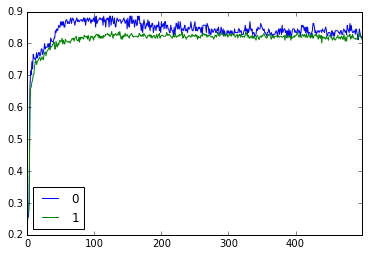

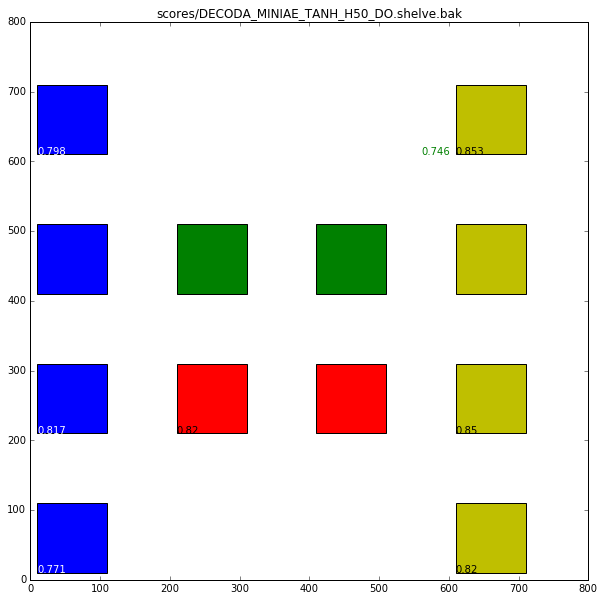

scores/MINIAE_TANH_H100_DO50.shelve


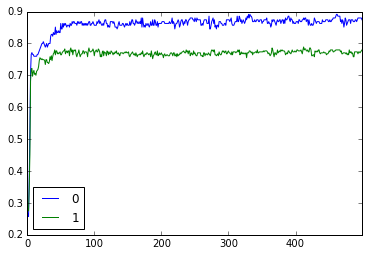

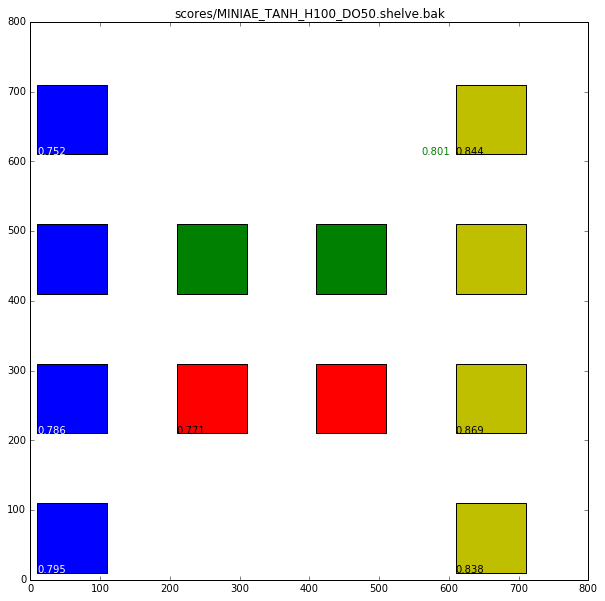

scores/MINIAE_TANH_H100_DOmlp.shelve


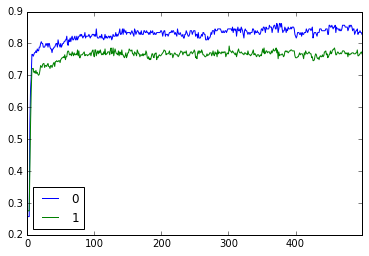

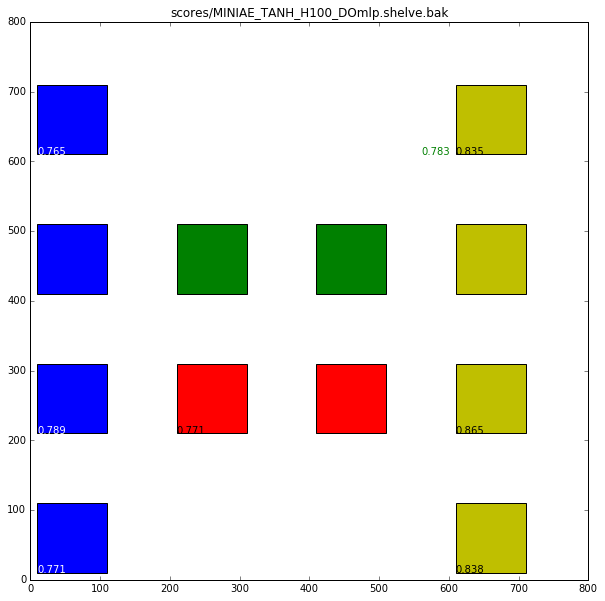

scores/DECODA_MINIAE_TANH_TFIDF_H30_DO.shelve


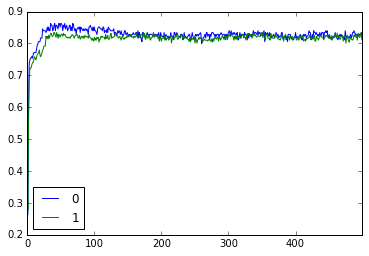

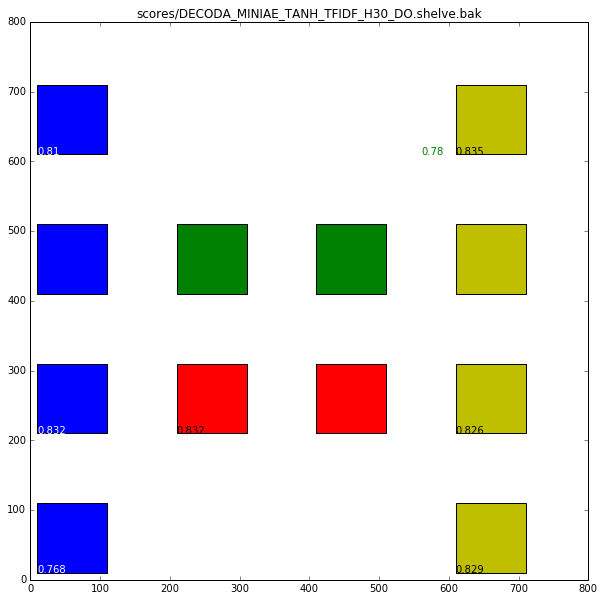

In [152]:
scores_ordoned={}
for i in glob.glob("scores/*DO*.bak"):
    #if "MINIAE" not in i :
     #   continue
    scores={}
    print i[:-4]
    data=shelve.open(i[:-4])
    for key,table in data.iteritems():
        scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
        if key not in scores_ordoned:
            scores_ordoned[key]=[scores[key]]
        else :
            scores_ordoned[key].append(scores[key])
            
    pandas.DataFrame(zip([x[0] for x in data["ASR_H1_TRANSFORMED_W1"][0] ],[x[0] for x in data["ASR_H1_TRANSFORMED_W1"][1] ])).plot()
    data.close()
    show_network_TRANS(scores,title=i,unite=200)
    #except:
    #    print "C4EST LA MERDE",i

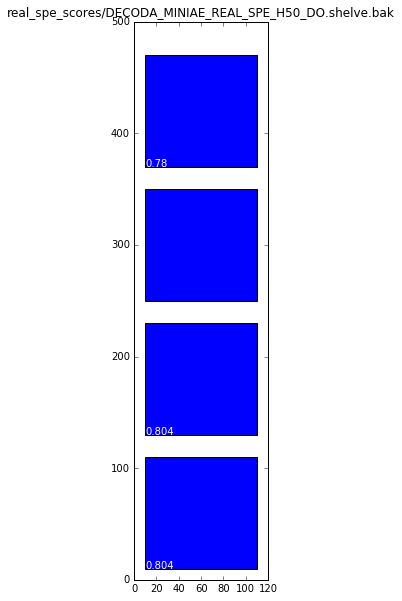

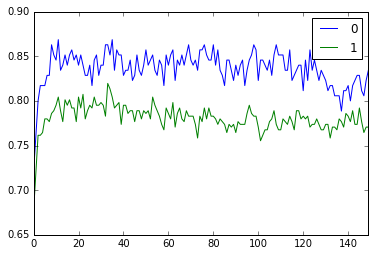

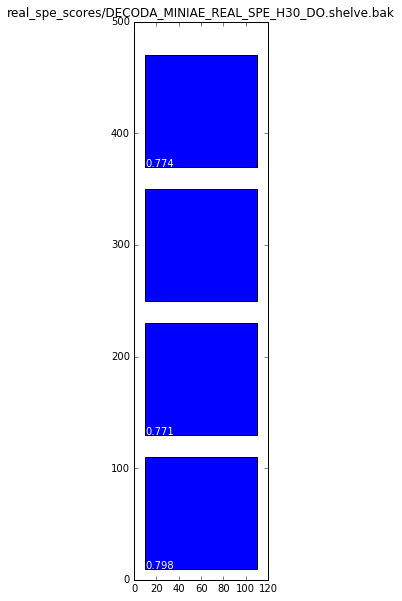

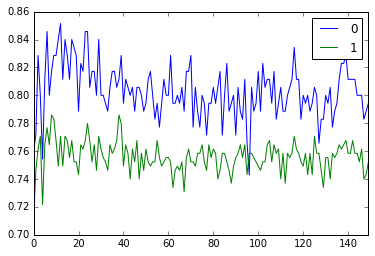

In [153]:

for i in glob.glob("real_spe_scores/*DO*.bak"):
    scores={}
    data=shelve.open(i[:-4])
    for key,table in data.iteritems():
        scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
    show_network_RSPE(scores,title=i)
    pandas.DataFrame(zip([x[0] for x in data["ASR_AE_H1"][0] ],[x[0] for x in data["ASR_AE_H1"][1] ])).plot()
    data.close()

In [139]:
ls UNFIXED_TRANS_scores

DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve.bak
DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve.dat
DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve.dir
DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve.bak
DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve.dat
DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve.dir


UNFIXED_TRANS_scores/DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve
['TRS_AE_H1', 'TRS_AE_OUT', 'TRS_SPARSE', 'ASR_AE_OUT', 'ASR_H2_TRANSFORMED', 'ASR_SPARSE', 'ASR_TRANFORMED_OUT', 'ASR_H1_TRANSFORMED', 'ASR_W1_TRANSFORMED', 'ASR_AE_H1']


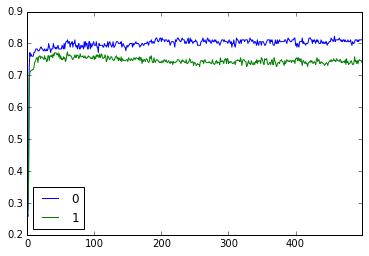

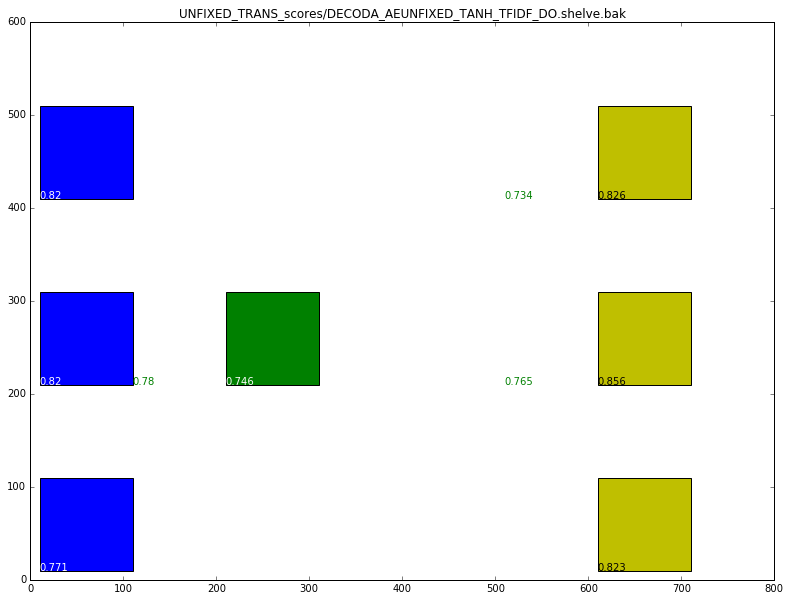

In [154]:
scores_ordoned={}
for i in glob.glob("UNFIXED_TRANS_scores/*DO*.bak"):
    scores={}
    print i[:-4]
    data=shelve.open(i[:-4])
    print data.keys()
    for key,table in data.iteritems():
        scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
        if key not in scores_ordoned:
            scores_ordoned[key]=[scores[key]]
        else :
            scores_ordoned[key].append(scores[key])
            
    pandas.DataFrame(zip([x[0] for x in data["ASR_W1_TRANSFORMED"][0] ],[x[0] for x in data["ASR_W1_TRANSFORMED"][1] ])).plot()
    data.close()
    show_network_UNFIXED(scores,title=i,unite=200)
    #except:
    #    print "C4EST LA MERDE",i

# Ci dessous  Mes tests rien de super interessant

In [ ]:
pred_train=data["TRS_AE_H2"][2].pred_train
y_pred_train=np.argmax(pred_train,axis=1)

pred_dev=data["TRS_AE_H2"][2].pred_dev
y_pred_dev=np.argmax(pred_dev,axis=1)

pred_test=data["TRS_AE_H2"][2].pred_test
y_pred_test=np.argmax(pred_test,axis=1)

In [ ]:
[0,1,2]*3

In [ ]:
corps=shelve.open("models/DECODA_AE_TANH_MINIBIN.shelve")

In [ ]:
y_train=corps["LABEL"]["TRAIN"].apply(utils.select).values
y_dev=corps["LABEL"]["DEV"].apply(utils.select).values
y_test=corps["LABEL"]["TEST"].apply(utils.select).values

In [ ]:
y_pred_train+1

In [ ]:
y_train

In [ ]:
precision_recall_fscore_support(y_train,y_pred_train+1,average="micro")

In [ ]:
precision_recall_fscore_support(y_dev,y_pred_dev+1,average="micro")

In [ ]:
precision_recall_fscore_support(y_test,y_pred_test+1,average="micro")

In [ ]:
data=shelve.open("scores/DECODA_AE_TANH_MINIBIN.shelve")
#data.close()
data

In [71]:
data=shelve.open("./scores/DECODA_MINIAE_TANH.shelve")

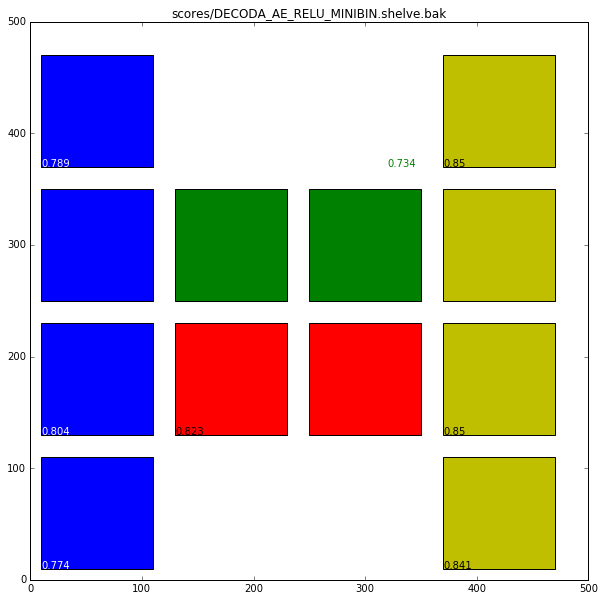

In [72]:
scores={}
#del scores_ordoned
for key,table in data.iteritems():
    scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
   # if key not in scores_ordoned:
   #     scores_ordoned[key]=[scores[key]]
   # else :
   #     scores_ordoned[key].append(scores[key])
#data.close()
show_network_TRANS(scores,title=i)

In [18]:
data.keys()

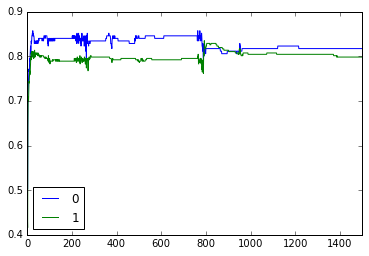

In [73]:
pandas.DataFrame(zip([x[0] for x in data["ASR_AE_H1"][0] ],[x[0] for x in data["ASR_AE_H1"][1] ])).plot()

In [53]:
histo=data["ASR_AE_H1"][3]

In [69]:
data.close()

In [61]:
corps=data=shelve.open("./models/DECODA_MINIAE_TANH.shelve")

In [66]:
pandas.DataFrame(corps["ASR_AE_H1"]["TRAIN"]).describe()

0           1           2           3           4           5   \
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000   
mean     0.000490    0.003229    0.000185   -0.003558   -0.000550    0.004855   
std      0.078052    0.076671    0.080473    0.080584    0.080445    0.083181   
min     -0.222832   -0.210684   -0.203158   -0.220618   -0.251787   -0.245800   
25%     -0.049280   -0.051630   -0.055798   -0.060583   -0.053978   -0.050834   
50%     -0.003148   -0.002347    0.003714   -0.000112   -0.003216    0.007316   
75%      0.053316    0.051167    0.051243    0.054151    0.044473    0.058679   
max      0.202271    0.241509    0.310983    0.215986    0.279413    0.259838   

               6           7           8           9      ...              40  \
count  740.000000  740.000000  740.000000  740.000000     ...      740.000000   
mean    -0.000353   -0.004828    0.000823   -0.004653     ...       -0.002893   
std      0.080656    0.080346    0.078400    0.084584     ...        0.075171   
min     -0.319214   -0.257791   -0.256614   -0.269018     ...       -0.205919   
25%     -0.055398   -0.058382   -0.045658   -0.061431     ...       -0.052172   
50%     -0.000941   -0.004883    0.007292   -0.004308     ...       -0.004255   
75%      0.054497    0.044757    0.052775    0.050786     ...        0.044183   
max      0.224492    0.234719    0.283880    0.251888     ...        0.229372   

               41          42          43          44          45          46  \
count  740.000000  740.000000  740.000000  740.000000  740.000000  740.000000   
mean     0.001393    0.000034   -0.000325   -0.000867   -0.001082   -0.004496   
std      0.082434    0.076875    0.078159    0.081996    0.080196    0.084964   
min     -0.272927   -0.216589   -0.232542   -0.239660   -0.215522   -0.237121   
25%     -0.051161   -0.054269   -0.053610   -0.054938   -0.056238   -0.066248   
50%      0.000609   -0.001102   -0.001316   -0.002811    0.000356   -0.000773   
75%      0.056505    0.054361    0.052624    0.049942    0.053420    0.056256   
max      0.252486    0.237473    0.236919    0.300617    0.227033    0.250967   

               47          48          49  
count  740.000000  740.000000  740.000000  
mean    -0.005450    0.006736    0.001526  
std      0.083766    0.081879    0.081213  
min     -0.217695   -0.253268   -0.216798  
25%     -0.068832   -0.048655   -0.054703  
50%     -0.008352    0.006316   -0.005236  
75%      0.049547    0.060626    0.050734  
max      0.276590    0.261683    0.316733  

[8 rows x 50 columns]

In [83]:
corps.close()

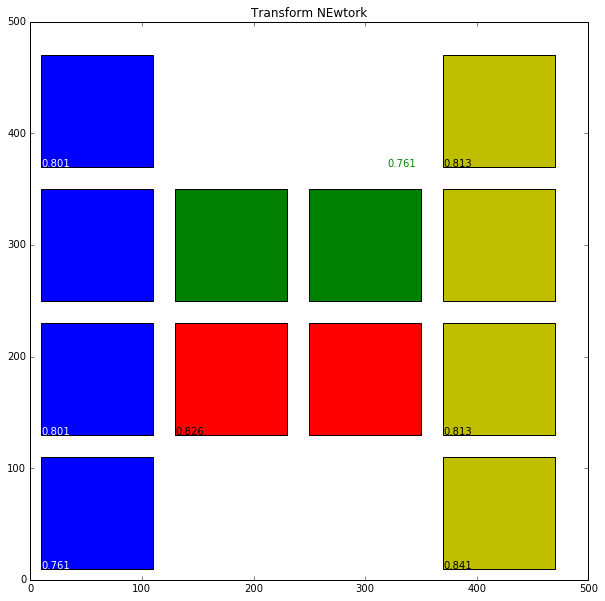

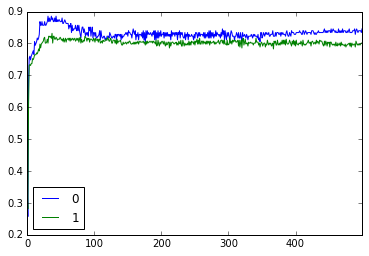

In [84]:
data=shelve.open("./scores/DECODA_MINIAE_TANH_TFIDF_H30.shelve")
scores={}
#del scores_ordoned
for key,table in data.iteritems():
    scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
   # if key not in scores_ordoned:
   #     scores_ordoned[key]=[scores[key]]
   # else :
   #     scores_ordoned[key].append(scores[key])
#data.close()
show_network_TRANS(scores)
pandas.DataFrame(zip([x[0] for x in data["ASR_AE_H1"][0] ],[x[0] for x in data["ASR_AE_H1"][1] ])).plot()
data.close()

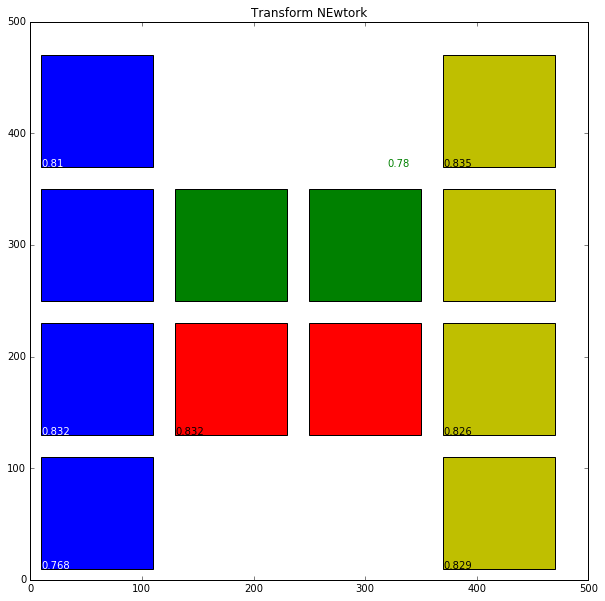

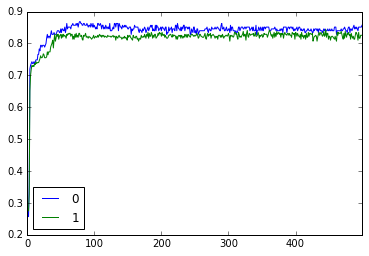

In [103]:
data=shelve.open("./scores/DECODA_MINIAE_TANH_TFIDF_H30_DO.shelve")
scores={}
#del scores_ordoned
for key,table in data.iteritems():
    scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
   # if key not in scores_ordoned:
   #     scores_ordoned[key]=[scores[key]]
   # else :
   #     scores_ordoned[key].append(scores[key])
#data.close()
show_network_TRANS(scores)
pandas.DataFrame(zip([x[0] for x in data["ASR_AE_H1"][0] ],[x[0] for x in data["ASR_AE_H1"][1] ])).plot()
data.close()

In [79]:
shelve.open("./Sparse_mat_tfidf.shelve")["ASR"]["TRAIN"].data

array([ 0.1998101 ,  0.12073141,  0.10901488, ...,  0.25165449,
        0.07732746,  0.08457387])

In [101]:
data=shelve.open("./real_spe_scores/REAL_SPE_1060_TFIDF.shelve")

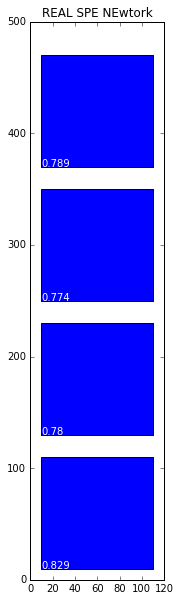

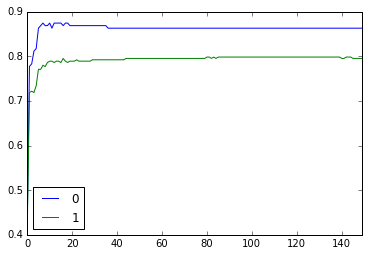

In [102]:
scores={}
#del scores_ordoned
for key,table in data.iteritems():
    scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
   # if key not in scores_ordoned:
   #     scores_ordoned[key]=[scores[key]]
   # else :
   #     scores_ordoned[key].append(scores[key])
#data.close()
show_network_RSPE(scores)pandas.DataFrame(zip([x[0] for x in data["ASR_AE_H1"][0] ],[x[0] for x in data["ASR_AE_H1"][1] ])).plot()
data.close()

In [96]:
data.keys()

['ASR', 'TRS_AE_OUT', 'ASR_AE_OUT', 'TRS', 'ASR_AE_H2', 'ASR_AE_H1']

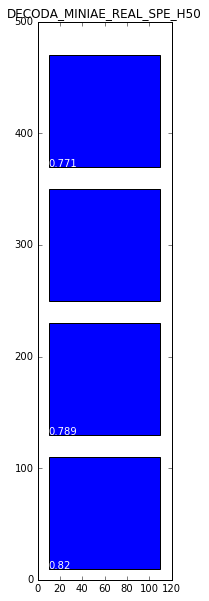

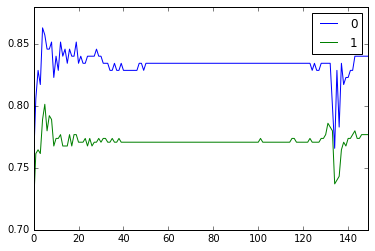

In [104]:
data=shelve.open("./real_spe_scores/DECODA_MINIAE_REAL_SPE_H50.shelve")
scores={}
#del scores_ordoned
for key,table in data.iteritems():
    scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
   # if key not in scores_ordoned:
   #     scores_ordoned[key]=[scores[key]]
   # else :
   #     scores_ordoned[key].append(scores[key])
#data.close()
show_network_RSPE(scores,title="DECODA_MINIAE_REAL_SPE_H50")
pandas.DataFrame(zip([x[0] for x in data["ASR_AE_H1"][0] ],[x[0] for x in data["ASR_AE_H1"][1] ])).plot()
data.close()

In [108]:
data=shelve.open("./scores/DECODA_MINIAE_TANH_TFIDF_H30_DO.shelve")

In [109]:
data.keys()

['TRS_AE_H1',
 'TRS_AE_OUT',
 'TRS_SPARSE',
 'ASR_H1_TRANFORMED_TRSH1',
 'ASR_AE_OUT',
 'ASR_H2_TRANFORMED_OUT',
 'ASR_SPARSE',
 'ASR_H1_TRANSFORMED_W1',
 'ASR_AE_H1']

In [111]:
data.close()

scores/DECODA_MINIAE_TANH_H50_DO.shelve


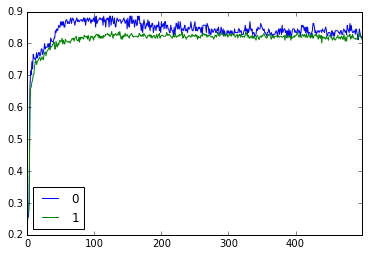

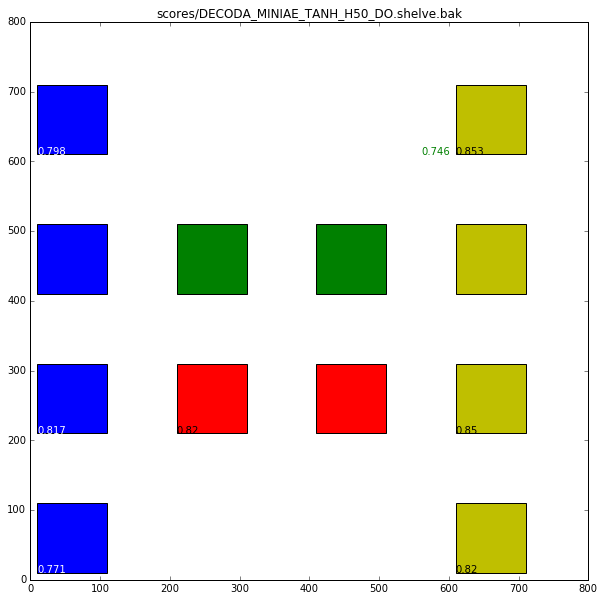

scores/MINIAE_TANH_H100_DO50.shelve


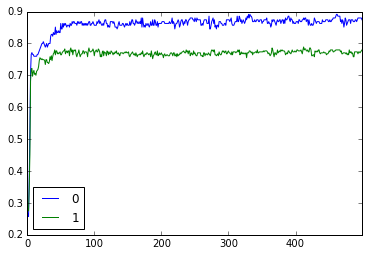

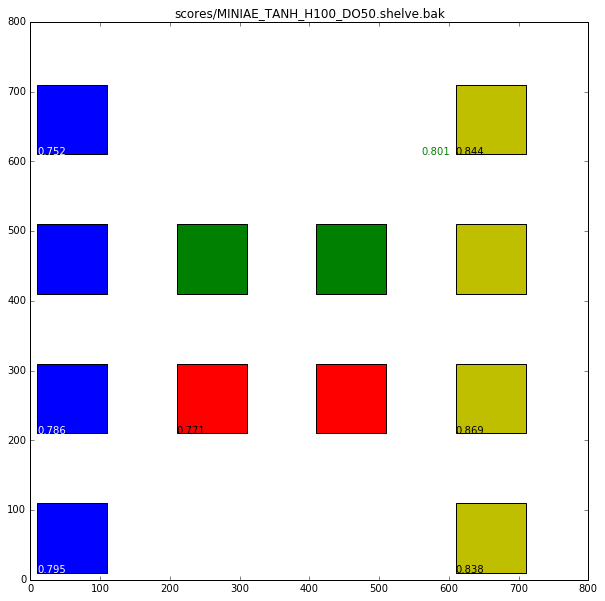

scores/DECODA_MINIAE_TANH_TFIDF_H30_DO.shelve


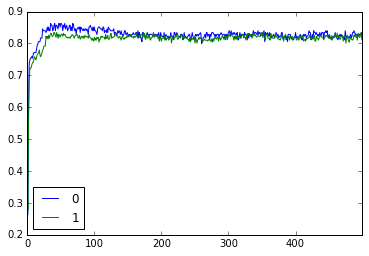

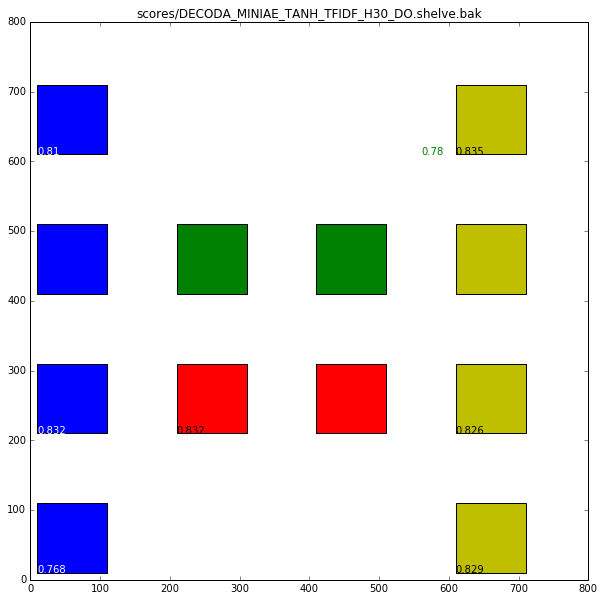

In [141]:
scores_ordoned={}
for i in glob.glob("scores/*DO*.bak"):
    if "MINIAE" not in i :
        continue
    scores={}
    print i[:-4]
    data=shelve.open(i[:-4])
    for key,table in data.iteritems():
        scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
        if key not in scores_ordoned:
            scores_ordoned[key]=[scores[key]]
        else :
            scores_ordoned[key].append(scores[key])
            
    pandas.DataFrame(zip([x[0] for x in data["ASR_H1_TRANSFORMED_W1"][0] ],[x[0] for x in data["ASR_H1_TRANSFORMED_W1"][1] ])).plot()
    data.close()
    show_network_TRANS(scores,title=i,unite=200)
    #except:
    #    print "C4EST LA MERDE",i

ASR_H1_TRANFORMED_OUT 0.697
ASR_H2_TRANFORMED_OUT 0.682
TRS_AE_OUT 0.838
TRS_SPARSE 0.841
ASR_SPARSE 0.78


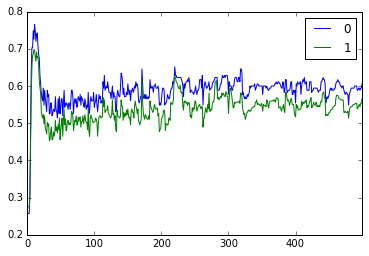

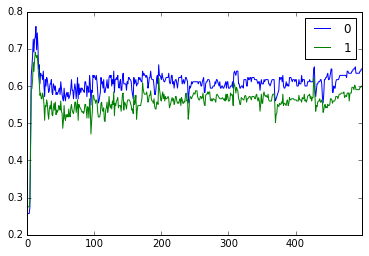

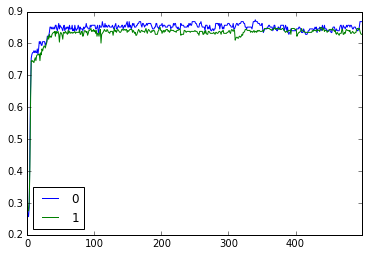

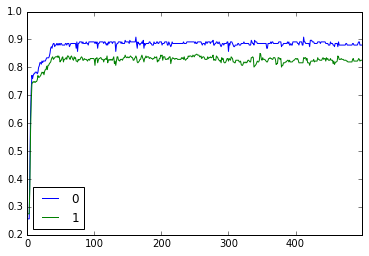

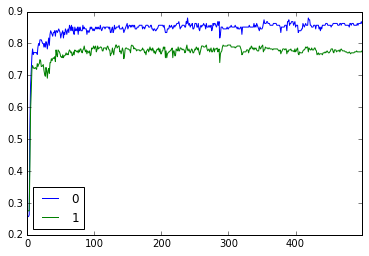

In [149]:
data=shelve.open("./scores/RAW_ASR_TRAIN.shelve")
scores={}
#del scores_ordoned
for key,table in data.iteritems():
    scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
    print key,scores[key]
   # if key not in scores_ordoned:
   #     scores_ordoned[key]=[scores[key]]
   # else :
   #     scores_ordoned[key].append(scores[key])
#data.close()
#show_network_TRANS(scores)
    pandas.DataFrame(zip([x[0] for x in data[key][0] ],[x[0] for x in data[key][1] ])).plot()
data.close()

scores/MINIAE_BIGBIN_TANH.shelve


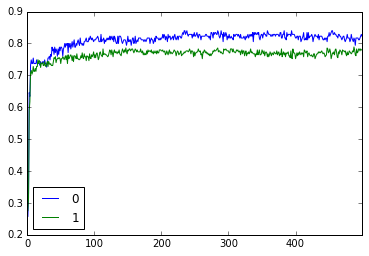

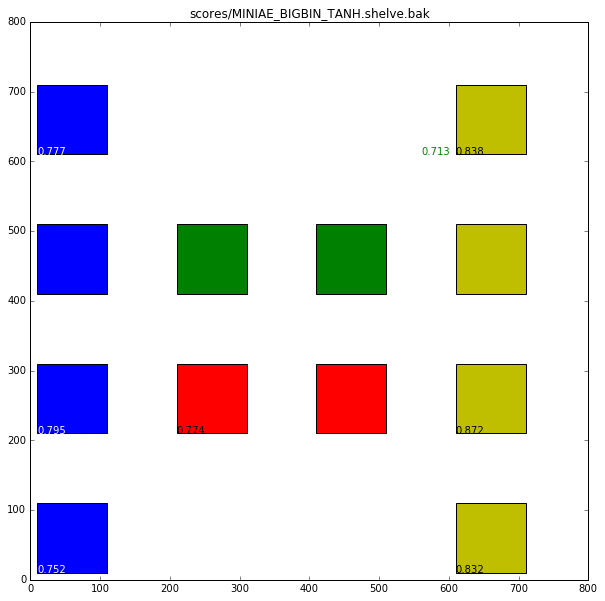

scores/DECODA_AE_TANH_TFIDF_BIGTRANS.shelve


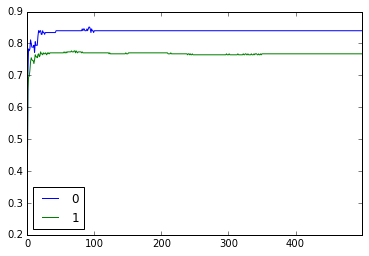

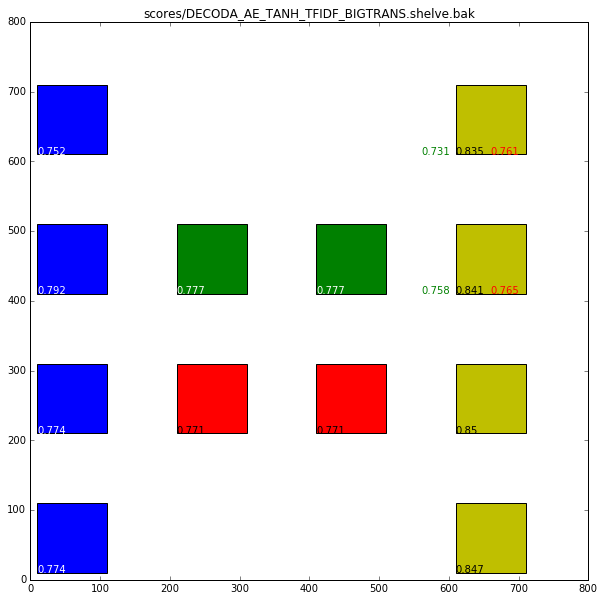

scores/DECODA_MINIAE_TANH_H50_DO.shelve


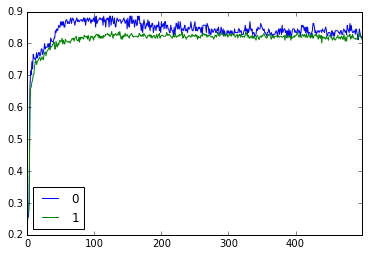

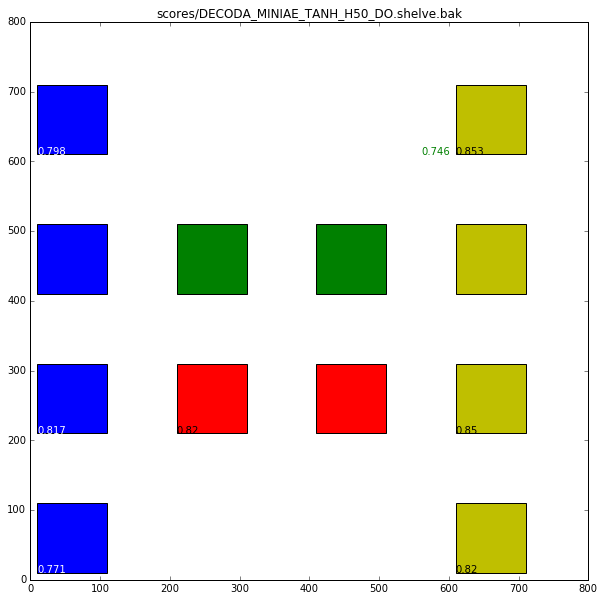

scores/MINIAE_TANH_H100_DO50.shelve


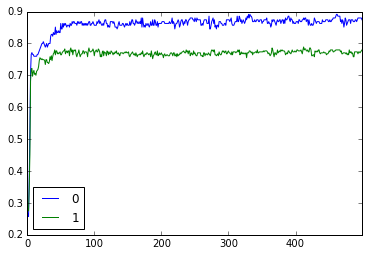

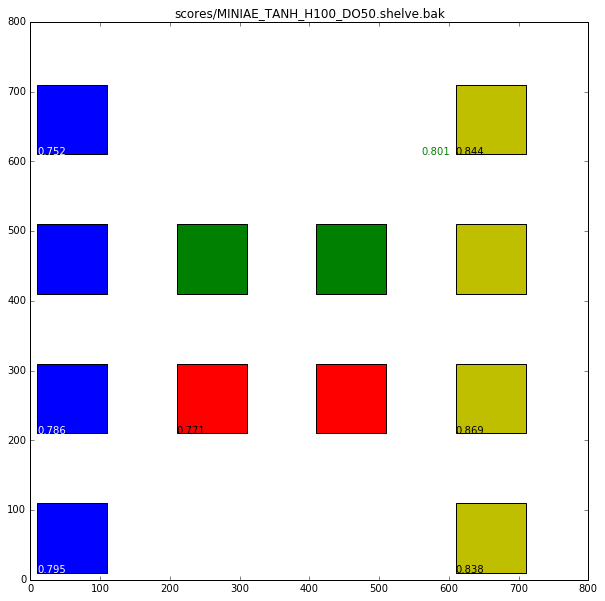

scores/MINIAE_TANH_H100_DOmlp.shelve


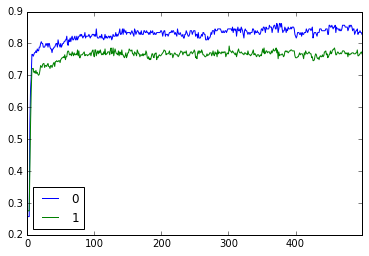

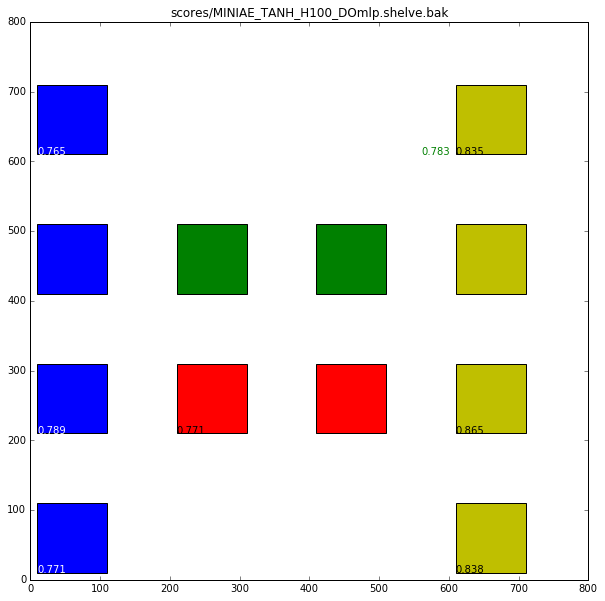

scores/DECODA_MINIAE_TANH.shelve


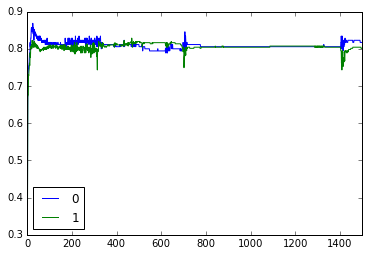

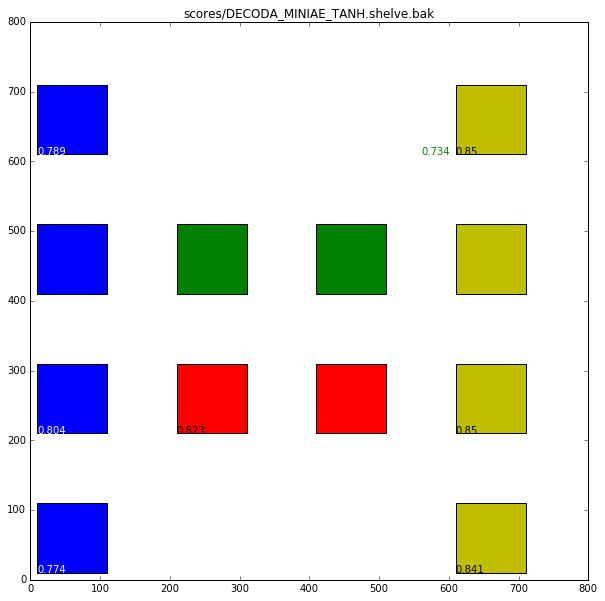

scores/RAW_TRS_TRAIN.shelve


KeyError: 'ASR_H1_TRANSFORMED_W1'

In [155]:
scores_ordoned={}
for i in glob.glob("scores/**.bak"):
    #if "MINIAE" not in i :
     #   continue
    scores={}
    print i[:-4]
    data=shelve.open(i[:-4])
    for key,table in data.iteritems():
        scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
        if key not in scores_ordoned:
            scores_ordoned[key]=[scores[key]]
        else :
            scores_ordoned[key].append(scores[key])
            
    pandas.DataFrame(zip([x[0] for x in data["ASR_H1_TRANSFORMED_W1"][0] ],[x[0] for x in data["ASR_H1_TRANSFORMED_W1"][1] ])).plot()
    data.close()
    show_network_TRANS(scores,title=i,unite=200)
    #except:
    #    print "C4EST LA MERDE",i

In [12]:
scores_ordoned={}
for i in glob.glob("UNFIXED_TRANS_scores/MINIAE*.bak"):
    scores={}
    print i[:-4]
    data=shelve.open(i[:-4])
    print data.keys()
    for key,table in data.iteritems():
        scores[key]=round(table[1][np.argmax([x[0] for x in table[0]])][0],3)
        if key not in scores_ordoned:
            scores_ordoned[key]=[scores[key]]
        else :
            scores_ordoned[key].append(scores[key])
            
    pandas.DataFrame(zip([x[0] for x in data["ASR_W1_TRANSFORMED"][0] ],[x[0] for x in data["ASR_W1_TRANSFORMED"][1] ])).plot()
    data.close()
    show_network_UNFIXED(scores,title=i,unite=200)

UNFIXED_TRANS_scores/MINIAE_TANH_H100_MODELDO50_DOMLP.shelve
[]


KeyError: 'ASR_W1_TRANSFORMED'

In [11]:
ls UNFIXED_TRANS_scores/

DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve.bak
DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve.dat
DECODA_AEUNFIXED_TANH_TFIDF_DO.shelve.dir
DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve.bak
DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve.dat
DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve.dir
DECODA_MINIAE_TANH_TFIDF_H30_DOMLP.shelve.bak
DECODA_MINIAE_TANH_TFIDF_H30_DOMLP.shelve.dat
DECODA_MINIAE_TANH_TFIDF_H30_DOMLP.shelve.dir
DECODA_MINIAE_TANH_TFIDF_H30.shelve.bak
DECODA_MINIAE_TANH_TFIDF_H30.shelve.dat
DECODA_MINIAE_TANH_TFIDF_H30.shelve.dir
MINIAE_TANH_H100_DOMLP.shelve.bak
MINIAE_TANH_H100_DOMLP.shelve.dat
MINIAE_TANH_H100_DOMLP.shelve.dir
MINIAE_TANH_H100_MODELDO50_DOMLP.shelve.bak
MINIAE_TANH_H100_MODELDO50_DOMLP.shelve.dat
MINIAE_TANH_H100_MODELDO50_DOMLP.shelve.dir
MINIAE_TANH_H100_MODELDO50.shelve.bak
MINIAE_TANH_H100_MODELDO50.shelve.dat
MINIAE_TANH_H100_MODELDO50.shelve.dir
MINIAE_TANH_H100.shelve.bak
MINIAE_TANH_H100.shelve.dat
MINIAE_TANH_H100.shelve.dir
MINIAE_TANH_H100_W3000_DOMLP.shelve.bak
MINIAE

TRS_AE_H1 92


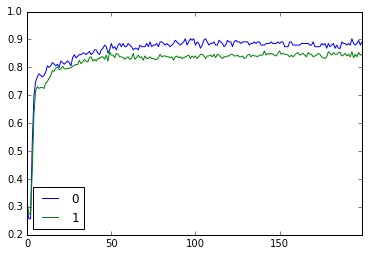

TRS_AE_OUT 129


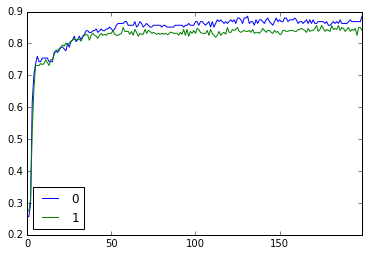

TRS_SPARSE 46


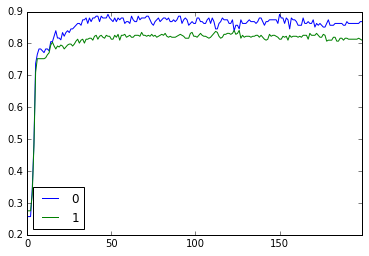

ASR_H1_TRANFORMED_TRSH1 181


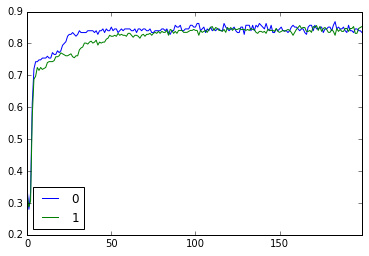

ASR_AE_OUT 104


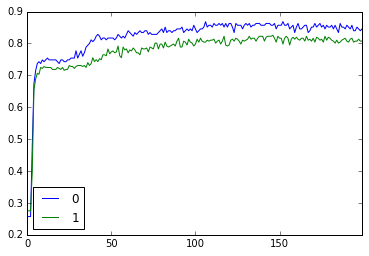

ASR_H2_TRANFORMED_OUT 123


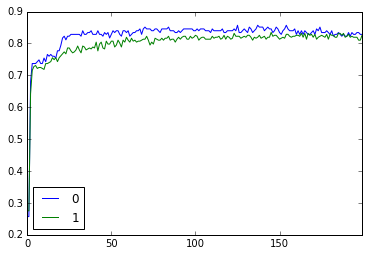

ASR_SPARSE 199


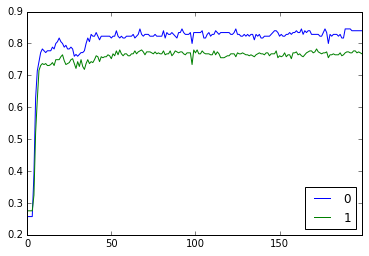

ASR_H1_TRANSFORMED_W1 109


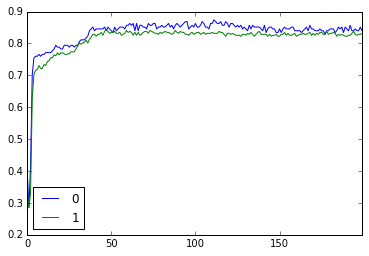

ASR_AE_H1 116


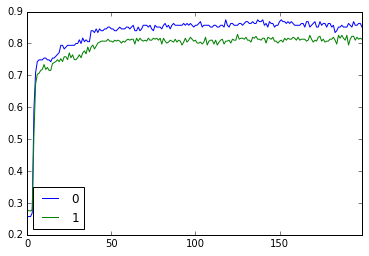

In [46]:
data=shelve.open("AUTO_scores/MINIAE_TANH_H50_W300_MODELSDO_DOMLP.shelve")
for key,table in data.iteritems():
    print key, np.argmax([x[0] for x in data[key][0] ][2:])
    pandas.DataFrame(zip([x[0] for x in data[key][0][:200] ],[x[0] for x in data[key][1][:200]  ])).plot()
    plt.show()
data.close()

ASR_AE_OUT 39


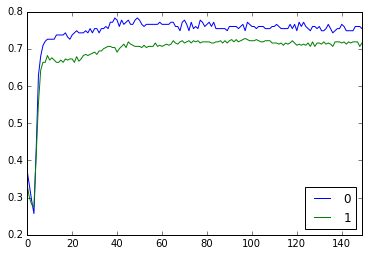

ASR 48


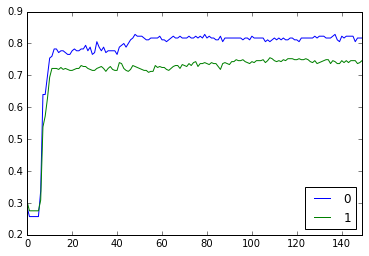

TRS 66


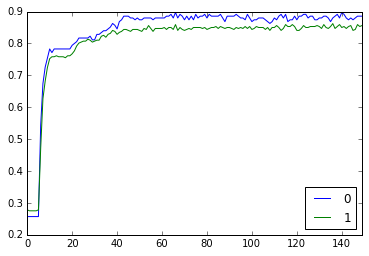

TRS_AE_OUT 127


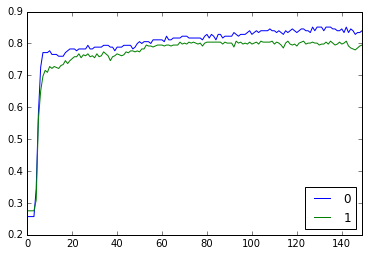

ASR_AE_H0 120


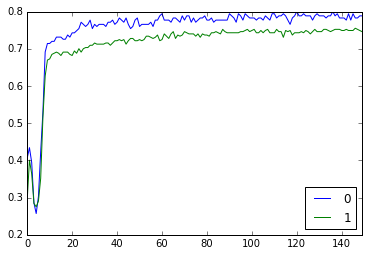

In [45]:
data=shelve.open("AUTO_real_spe_scores/V2_REAL_SPE_TANH_DOMODELS_50_DOMLP.shelve")
for key,table in data.iteritems():
    print key, np.argmax([x[0] for x in data[key][0] ])
    pandas.DataFrame(zip([x[0] for x in data[key][0][:200] ],[x[0] for x in data[key][1][:200]  ])).plot()
    plt.show()
data.close()

TRS_AE_H1 110


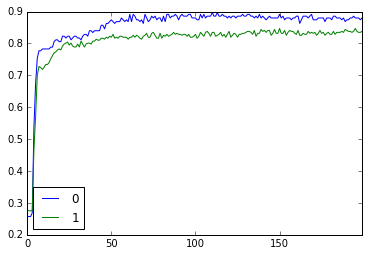

TRS_AE_OUT 29


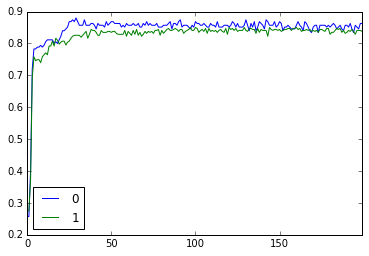

TRS_SPARSE 54


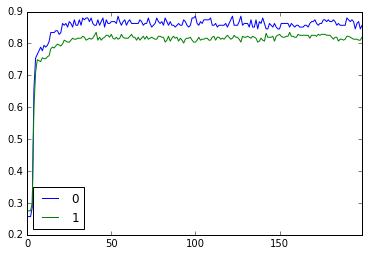

ASR_AE_OUT 75


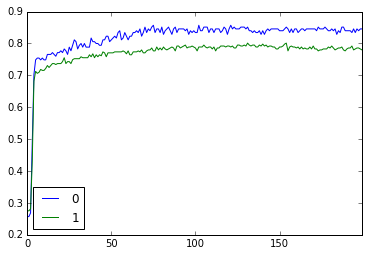

ASR_H2_TRANSFORMED 68


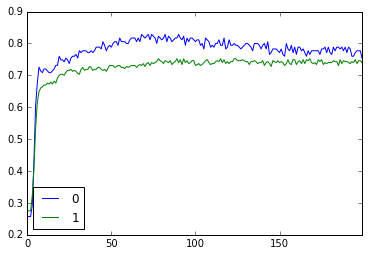

ASR_SPARSE 95


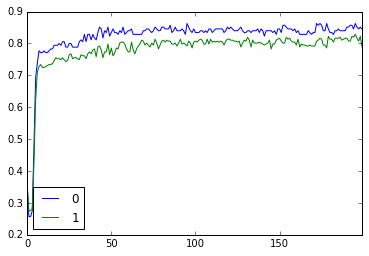

ASR_TRANFORMED_OUT 64


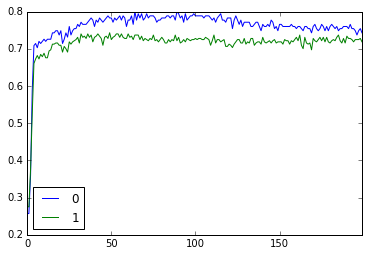

ASR_H1_TRANSFORMED 101


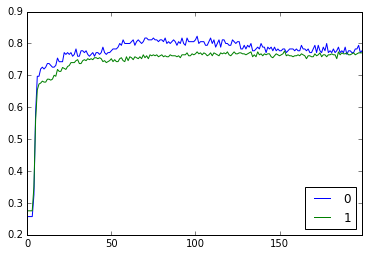

ASR_W1_TRANSFORMED 59


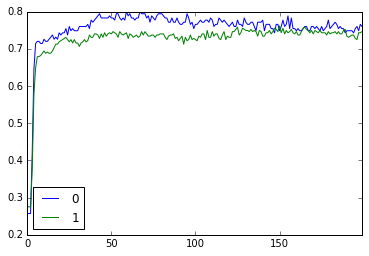

ASR_AE_H1 132


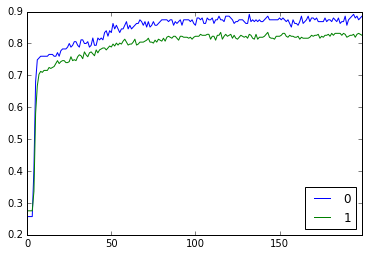

In [44]:
data=shelve.open("UNFIXED_TRANS_scores/V2_UNFIXED_TANH_50_W300_DOMLP.shelve")
for key,table in data.iteritems():
    print key, np.argmax([x[0] for x in data[key][0] ])
    pandas.DataFrame(zip([x[0] for x in data[key][0][:200] ],[x[0] for x in data[key][1][:200]  ])).plot()
    plt.show()
data.close()

TRS_AE_H1 94


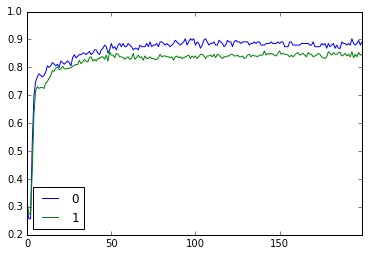

TRS_AE_OUT 131


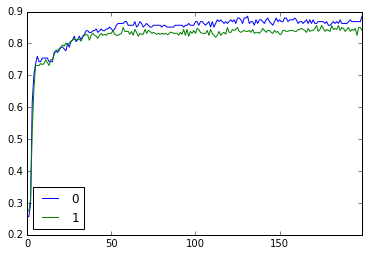

TRS_SPARSE 48


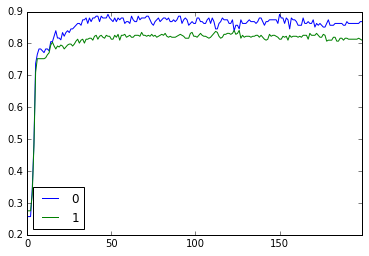

ASR_H1_TRANFORMED_TRSH1 183


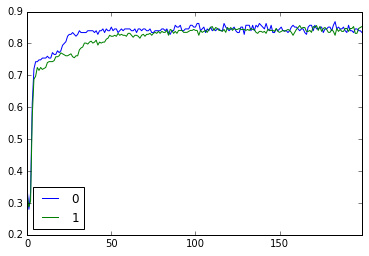

ASR_AE_OUT 106


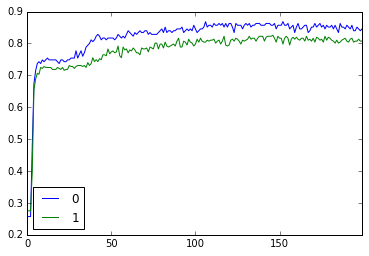

ASR_H2_TRANFORMED_OUT 125


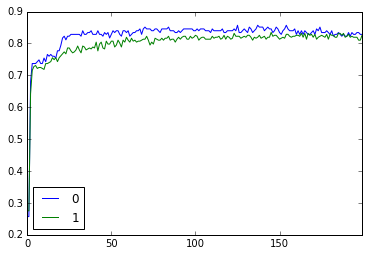

ASR_SPARSE 201


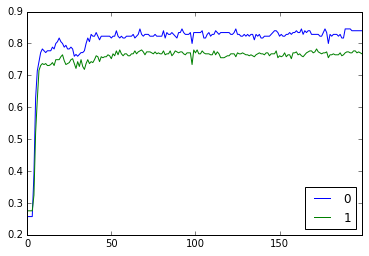

ASR_H1_TRANSFORMED_W1 111


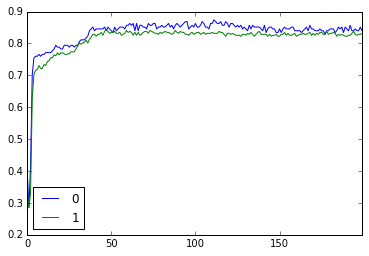

ASR_AE_H1 118


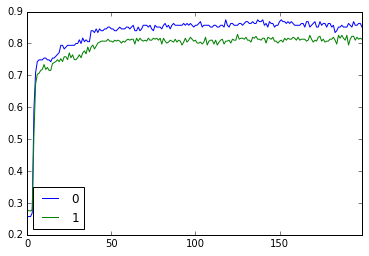

In [37]:
data=shelve.open("AUTO_scores/MINIAE_TANH_H50_W300_MODELSDO_DOMLP.shelve")
for key,table in data.iteritems():
    print key, np.argmax([x[0] for x in data[key][0] ])
    pandas.DataFrame(zip([x[0] for x in data[key][0][:200] ],[x[0] for x in data[key][1][:200]  ])).plot()
    plt.show()
data.close()

In [42]:
data=shelve.open("./models/MINIAE_TANH_H50_W300.shelve")
print data.keys()
data.close()

['TRS_AE_H1', 'TRS_AE_OUT', 'TRS_SPARSE', 'LABEL', 'ASR_AE_OUT', 'ASR_H2_TRANFORMED_OUT', 'ASR_SPARSE', 'ASR_H1_TRANFORMED_TRSH1', 'ASR_H1_TRANSFORMED_W1', 'ASR_AE_H1']


In [21]:
data=shelve.open("./UNFIXED_TRANS_scores/DECODA_AEUNFIXED_TANH_TFIDF_MODELS.shelve")

In [22]:
data.keys()


['TRS_AE_H1',
 'TRS_AE_OUT',
 'TRS_SPARSE',
 'ASR_AE_OUT',
 'ASR_H2_TRANSFORMED',
 'ASR_SPARSE',
 'ASR_TRANFORMED_OUT',
 'ASR_H1_TRANSFORMED',
 'ASR_W1_TRANSFORMED',
 'ASR_AE_H1']

In [25]:
data["ASR_TRANFORMED_OUT"].key()

AssertionError: (AssertionError('The following error happened while compiling the node', MaxAndArgmax(y, TensorConstant{(1,) of 1}), '\n'), <function _constructor_Function at 0x7fbb1b6e4140>, (<theano.compile.function_module.FunctionMaker object at 0x7fbab61abc10>, [<None>, <None>, <None>, <<CudaNdarray object at 0x7fbab99bc8b0>>, <<CudaNdarray object at 0x7fbab5abfaf0>>, <<CudaNdarray object at 0x7fbab5e048f0>>, <<CudaNdarray object at 0x7fbab5c050f0>>, <<CudaNdarray object at 0x7fbab5df9cb0>>, <<CudaNdarray object at 0x7fbab5d5ddf0>>, <<CudaNdarray object at 0x7fbab5c2b3f0>>, <<CudaNdarray object at 0x7fbab5c34db0>>], [None, None, None, <CudaNdarray object at 0x7fbab99bc8b0>, <CudaNdarray object at 0x7fbab5abfaf0>, <CudaNdarray object at 0x7fbab5e048f0>, <CudaNdarray object at 0x7fbab5c050f0>, <CudaNdarray object at 0x7fbab5df9cb0>, <CudaNdarray object at 0x7fbab5d5ddf0>, <CudaNdarray object at 0x7fbab5c2b3f0>, <CudaNdarray object at 0x7fbab5c34db0>]))

In [ ]:
data.close()

In [8]:
for key,table in data.iteritems():
    print key, np.argmax([x[0] for x in data[key][0] ])
    pandas.DataFrame(zip([x[0] for x in data[key][0][:200] ],[x[0] for x in data[key][1][:200]  ])).plot()
    plt.show()
data.close()

Using gpu device 1: GeForce GTX TITAN X


KeyboardInterrupt: (KeyboardInterrupt(), <function _constructor_Function at 0x7fbb1b6e4140>, (<theano.compile.function_module.FunctionMaker object at 0x7fbb2603f5d0>, [<None>, <None>, <None>, <<CudaNdarray object at 0x7fbabf90ec70>>, <<CudaNdarray object at 0x7fbabf90eab0>>, <<CudaNdarray object at 0x7fbabf91c0b0>>, <<CudaNdarray object at 0x7fbabf90ef30>>, <<CudaNdarray object at 0x7fbabf91c4b0>>, <<CudaNdarray object at 0x7fbabf91c370>>, <<CudaNdarray object at 0x7fbabf91c8b0>>, <<CudaNdarray object at 0x7fbabf91c770>>], [None, None, None, <CudaNdarray object at 0x7fbabf90ec70>, <CudaNdarray object at 0x7fbabf90eab0>, <CudaNdarray object at 0x7fbabf91c0b0>, <CudaNdarray object at 0x7fbabf90ef30>, <CudaNdarray object at 0x7fbabf91c4b0>, <CudaNdarray object at 0x7fbabf91c370>, <CudaNdarray object at 0x7fbabf91c8b0>, <CudaNdarray object at 0x7fbabf91c770>]))